<a href="https://colab.research.google.com/github/hibnu-putra/pembelajaran-mesin/blob/main/Repo-3/FixedDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [ ]:
df = pd.read_csv('Students_Grading_Dataset.csv')

In [ ]:
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,83.60,A,7.8,No,No,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,50.60,C,24.2,No,Yes,NaN,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,90.32,D,7.6,No,Yes,NaN,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,77.35,A,14.5,Yes,No,PhD,Medium,10,5.9


### Data Cleaning & Preprocessing

In [ ]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [ ]:
irrelevant_cols = ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score','Grade']
df.drop(columns=irrelevant_cols, inplace=True),

(None,)

In [ ]:
df

,Gender,Age,Department,Attendance (%),Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,83.49,10.3,Yes,No,Master's,Medium,1,5.9
1,Male,18,Business,97.71,92.29,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,93.55,12.4,Yes,No,High School,Low,9,6.1
3,Female,24,Engineering,90.38,51.03,25.5,No,Yes,High School,Low,8,4.9
4,Female,23,CS,59.41,90.91,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,CS,96.09,83.60,7.8,No,No,Master's,Medium,10,4.5
4996,Male,19,Mathematics,96.30,50.60,24.2,No,Yes,NaN,Medium,4,7.2
4997,Female,24,CS,89.94,90.32,7.6,No,Yes,NaN,High,5,6.6
4998,Male,23,Engineering,99.09,77.35,14.5,Yes,No,PhD,Medium,10,5.9


In [ ]:
# Membuat kolom Grade berdasarkan Total_Score
#A: 85–100
#B: 70–84
#C: 55–69
#D: 40–54
#E: < 40
def get_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 55:
        return 'C'
    elif score >= 40:
        return 'D'
    else:
        return 'E'

df['Grade'] = df['Total_Score'].apply(get_grade)

In [ ]:
df

,Gender,Age,Department,Attendance (%),Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Grade
0,Female,22,Mathematics,97.36,83.49,10.3,Yes,No,Master's,Medium,1,5.9,B
1,Male,18,Business,97.71,92.29,27.1,No,No,High School,Low,4,4.3,A
2,Male,24,Engineering,99.52,93.55,12.4,Yes,No,High School,Low,9,6.1,A
3,Female,24,Engineering,90.38,51.03,25.5,No,Yes,High School,Low,8,4.9,D
4,Female,23,CS,59.41,90.91,13.3,Yes,No,Master's,Medium,6,4.5,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,CS,96.09,83.60,7.8,No,No,Master's,Medium,10,4.5,B
4996,Male,19,Mathematics,96.30,50.60,24.2,No,Yes,NaN,Medium,4,7.2,D
4997,Female,24,CS,89.94,90.32,7.6,No,Yes,NaN,High,5,6.6,A
4998,Male,23,Engineering,99.09,77.35,14.5,Yes,No,PhD,Medium,10,5.9,B


### Visualisasi

In [ ]:
df.columns

Index(['Gender', 'Age', 'Department', 'Attendance (%)', 'Total_Score',
       'Study_Hours_per_Week', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night',
       'Grade'],
      dtype='object')

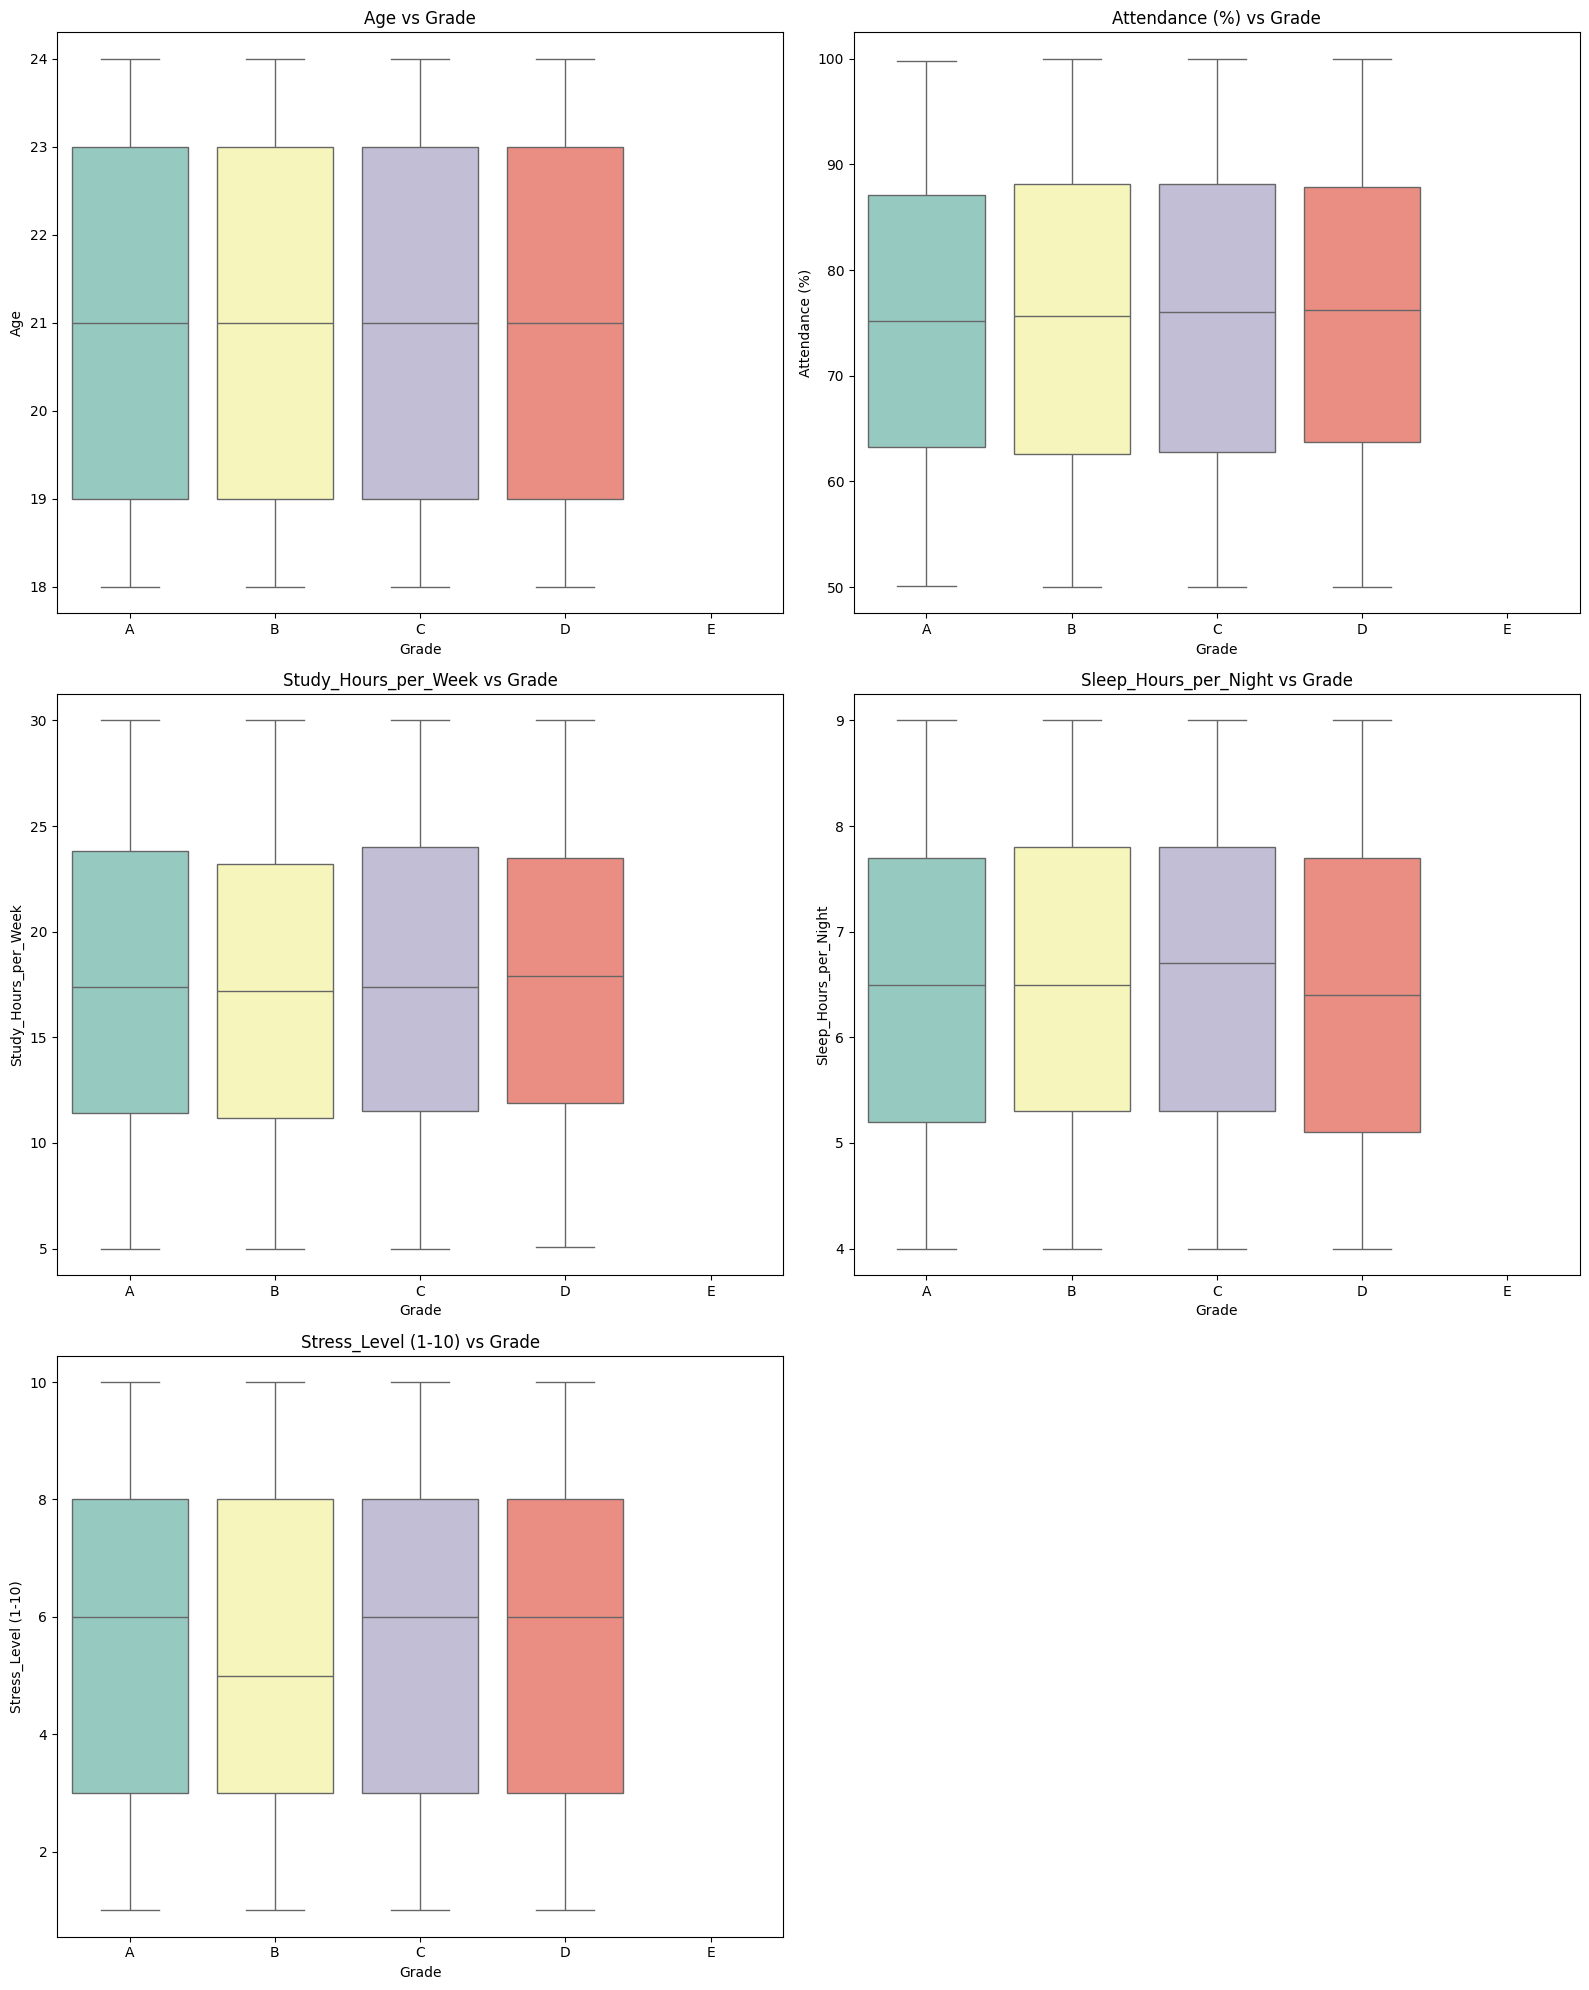

In [ ]:
#Daftar kolom numerik
numeric_cols = ['Age', 'Attendance (%)', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Stress_Level (1-10)']

plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='Grade', y=col, order=['A', 'B', 'C', 'D', 'E'], palette='Set3')
    plt.title(f'{col} vs Grade')
    plt.xlabel('Grade')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

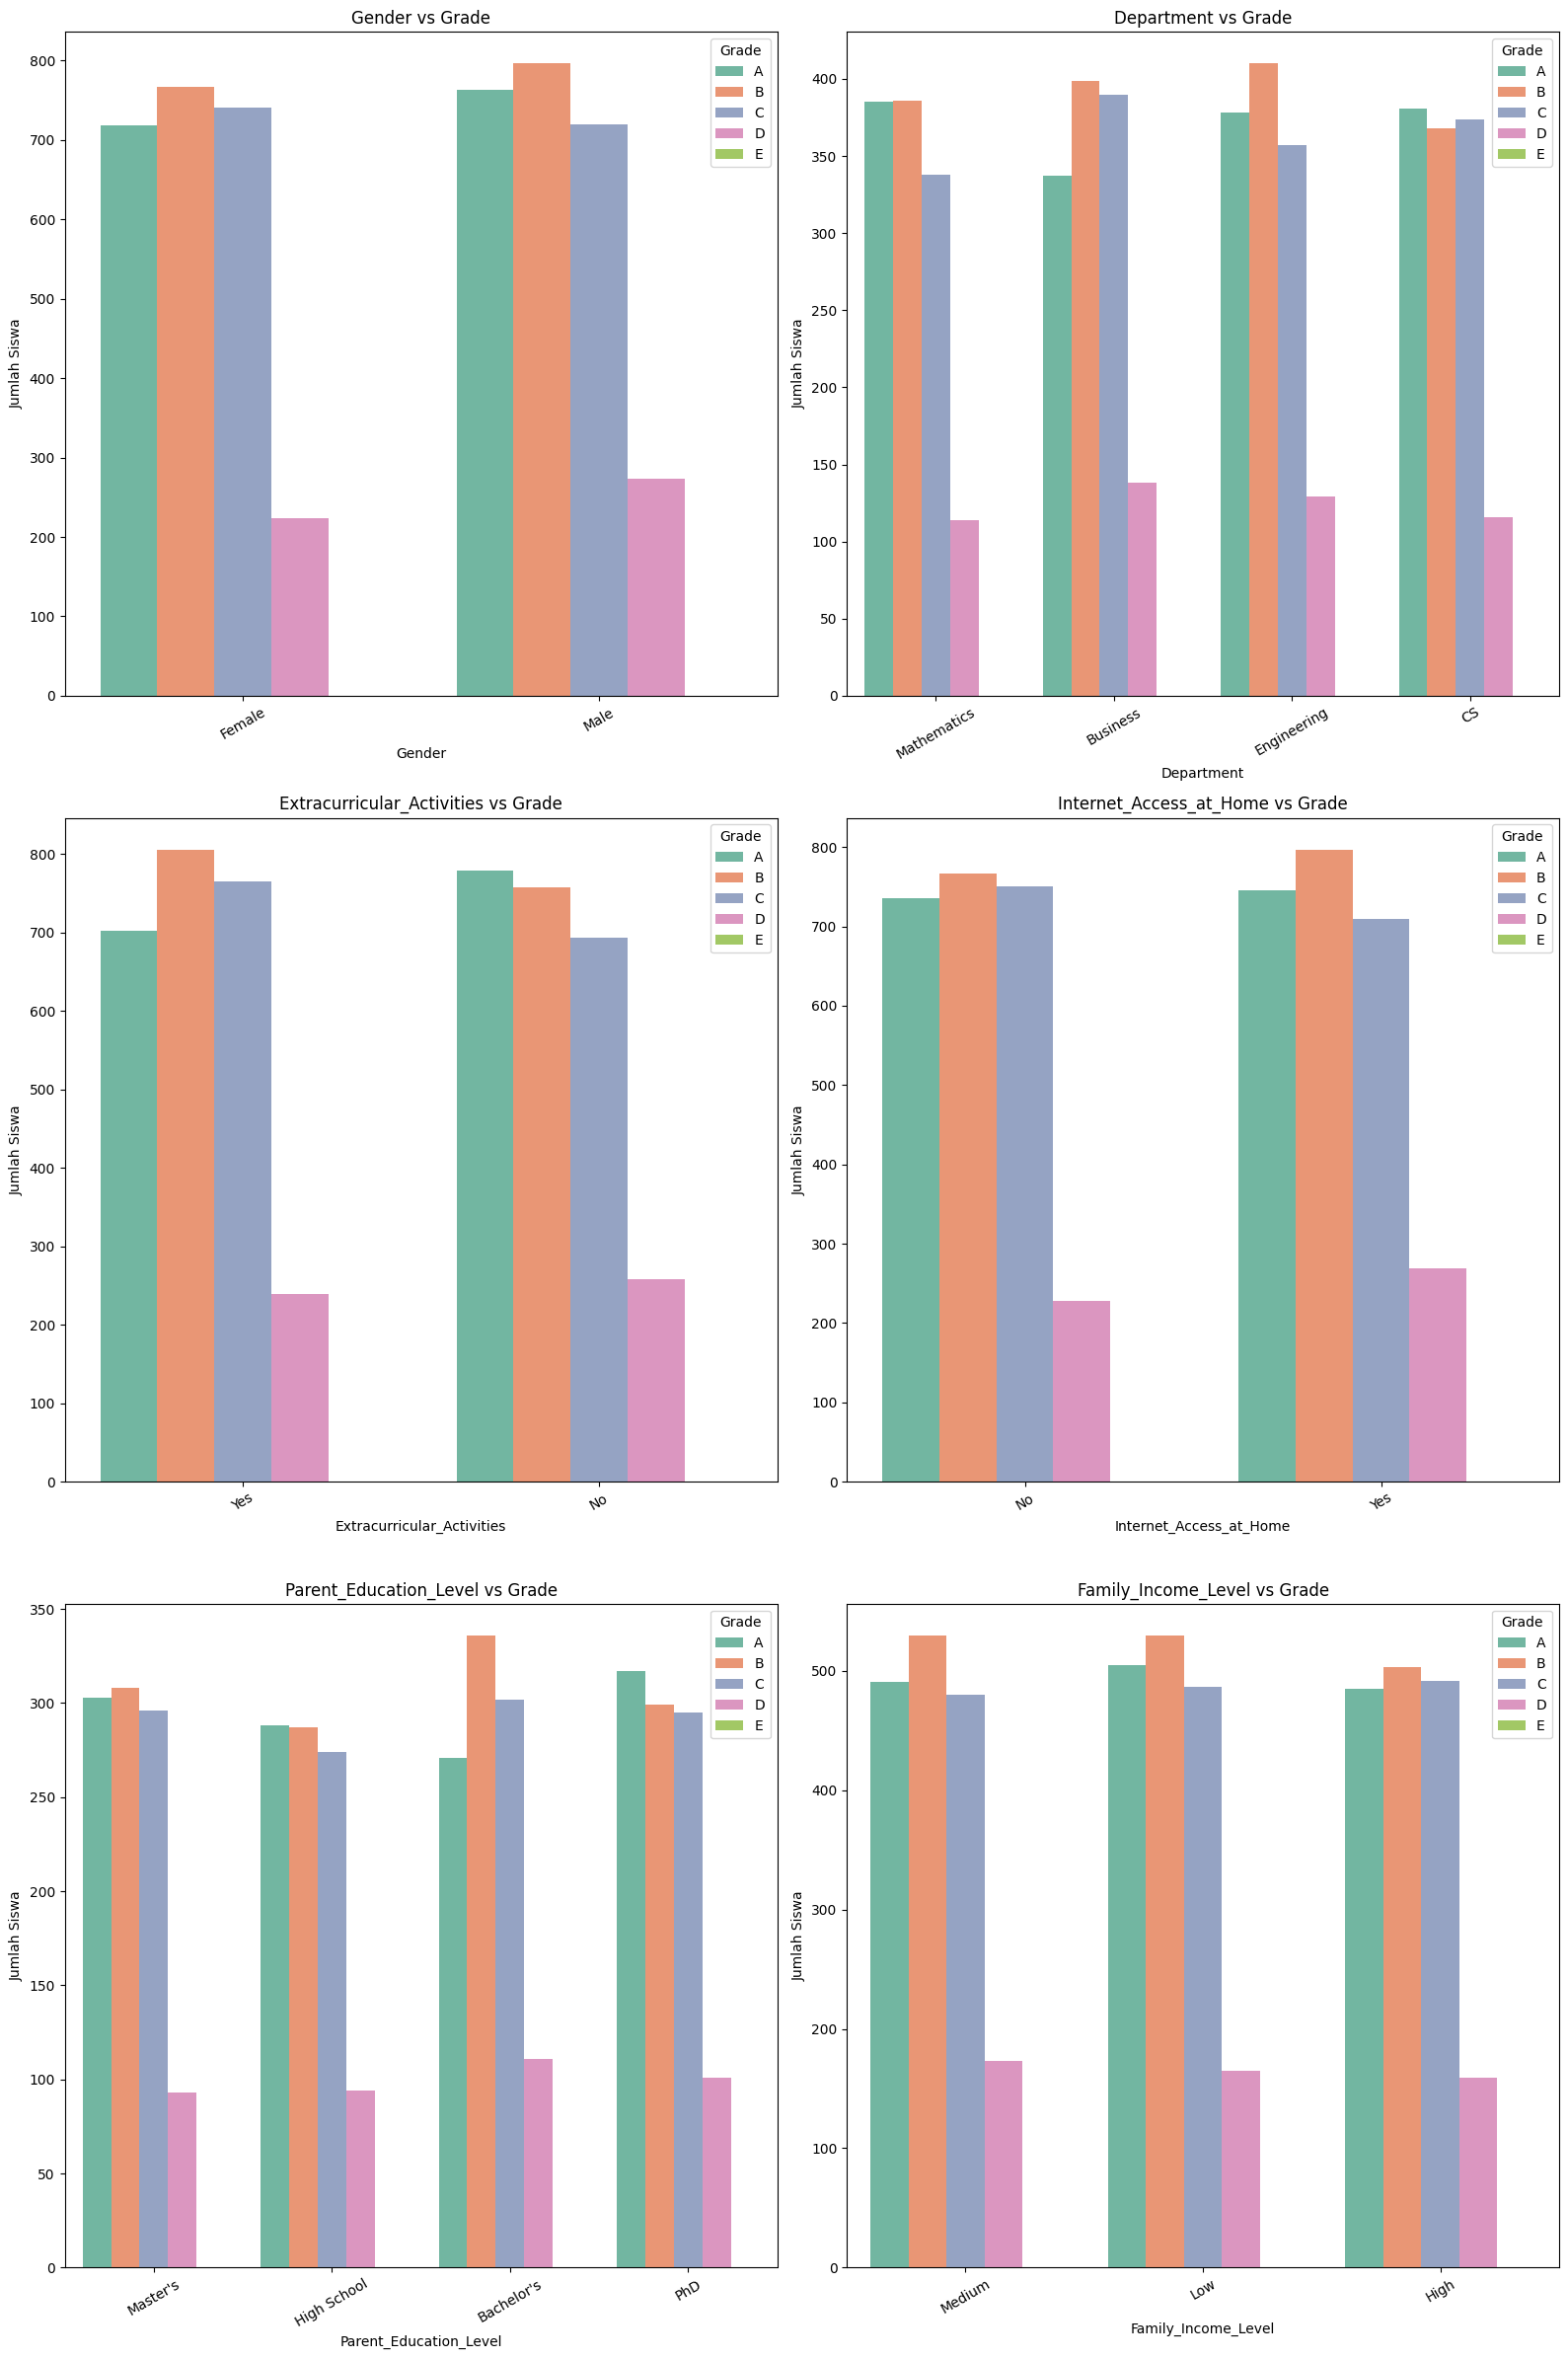

In [ ]:
#Daftar kolom kategorikal
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities',
                    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']

plt.figure(figsize=(16, 24))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='Grade', hue_order=['A', 'B', 'C', 'D', 'E'], palette='Set2')
    plt.title(f'{col} vs Grade')
    plt.xlabel(col)
    plt.ylabel('Jumlah Siswa')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Machine Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

In [ ]:
X = df_encoded.drop(columns=['Grade'])
y = df_encoded['Grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'ANN (MLP)': MLPClassifier(max_iter=1000)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc * 100

In [ ]:
results_sorted = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
model_names = list(results_sorted.keys())
accuracy_scores = list(results_sorted.values())

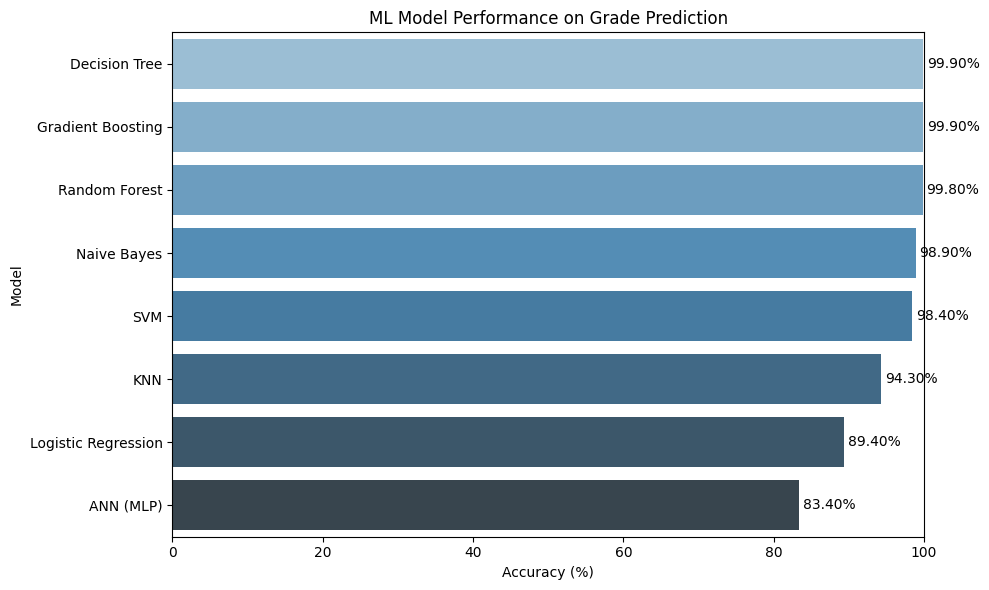

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names, palette='Blues_d')
for i, v in enumerate(accuracy_scores):
    plt.text(v + 0.5, i, f"{v:.2f}%", color='black', va='center')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('ML Model Performance on Grade Prediction')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()